Este colab fue desarrollado por Arnold Charry Armero.

# El Modelo EPQ (Economic Production Quantity)

Este modelo de inventarios es una extensión del modelo EOQ. Una de las principales diferencias entre estos dos modelos es que el modelo EPQ elimina el supuesto de una tasa de reabastecimiento infinita del EOQ, convirtiéndola en una finita, lo cual va más acorde a un ambiente de producción (Sipper & Bulfin, 1998). A su vez, se permite que haya faltantes que tendrán que ser entregados después al cliente, pero que tendrán su respectivo costo asociado. Otra gran diferencia es que este modelo incorpora una tasa de producción, la cual es la velocidad a la cual se fabrican los productos. Posteriormente a la producción, la demanda va disminuyendo el inventario hasta volver a incurrir en faltantes.

**Supuestos:**

*   Existe un solo producto en el sistema de inventarios
*   La demanda es uniforme y determinística
*   Se permiten faltantes
*   No hay un tiempo de entrega
*   Tasa de reabastecimiento finita, es decir, después de cierto tiempo el inventario se llena.


La geometría del inventario de este modelo es la siguiente,

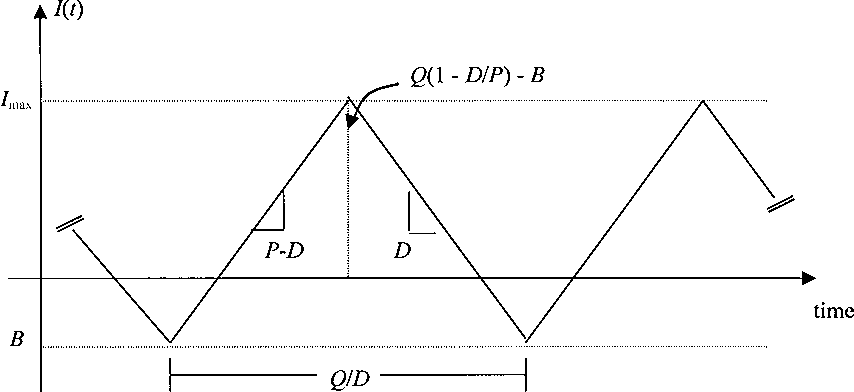

Matemáticamente, el modelo se expresa de la siguiente manera:

$$ K(Q, \:b) = cD + \frac{AD}{Q} +\frac{h \left [ Q\left ( 1 - \frac{D}{\psi} \right ) - b \right  ]^{2}}{2Q \left ( 1 - \frac{D}{\psi} \right ) } + \frac{\pi bD}{Q} + \frac{\hat{\pi}b^{2}}{2Q \left ( 1 - \frac{D}{\psi} \right )}  $$

donde,

$ Q = \mathrm{Cantidad \:de \: lote \: a \: producir} $

$ b = \mathrm{Cantidad \:de \: faltantes \: a \: permitir} $

$ c = \mathrm{Costo \: unitario \: de \: producción} $

$ D = \mathrm{Tasa \:de \: demanda} $

$ \psi = \mathrm{Tasa \:de \: producción} $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ \pi = \mathrm{Costo \:unitario \: de \: faltantes} $

$ \hat{\pi} = \mathrm{Costo \:unitario \: de \: faltantes \: en \: el \: tiempo} $

$ h = \mathrm{Costo \:unitario \: de \: mantener \: en \: inventario} $

$ K = \mathrm{Costo \: total \: promedio} $

Para saber la cantidad óptima de lote a ordenar, se debe derivar parcialmente la función con respecto a $Q$ y $b$ e igualar a 0. De este sistema de ecuaciones se hallan los óptimos. Matemáticamente se expresa esto de la siguiente manera,

$$ \frac{\partial K}{\partial Q} = 0, \frac{\partial K}{\partial b} = 0 $$

Simplificando y despejando $Q$ y $b$,

$$ Q^{*} = \sqrt{\frac{2AD}{h\left ( 1 - \frac{D}{\psi } \right )} - \frac{\left ( \pi D \right )^{2}}{h \left ( h+\hat{\pi } \right )}} \sqrt{\frac{h+\hat{\pi }}{\hat{\pi }}} $$

$$ b^{*} = \frac{\left ( hQ^{*}-\pi D \right )\left ( 1 - \frac{D}{\psi } \right )}{\left ( h + \hat{\pi } \right )} $$

Estas formulas nos indican cuánto se debe ordenar y cuántos faltantes tener con el fin de minimizar los costos de inventario. Para efectos de practicidad, se utilizará Python para resolver ejercicios. Ahora se continua con la implementación en código resolviendo el siguiente ejemplo.


**Ejemplo 6-3. EPQ con faltantes.** SuperSauce produce un aderezo de ensalada. La demanda de este
aderezo es alrededor de 400 libras por mes y SuperSauce puede fabricarlo a una tasa de 2000 libras
por mes. Para iniciar la producción, tienen que verificar y limpiar las máquinas en forma exhaustiva
y cada preparación cuesta $\$120$. El costo de producir este aderezo es $\$3$ por libra y el costo de mantenerlo
en inventario se estima en $20$% anual. Si la demanda de este aderezo excede a lo disponible en
inventario la orden se surte después. La administración piensa que los faltantes incurren en dos tipos
de costo, la pérdida de buena voluntad y una sanción por el faltante. La pérdida de la buena voluntad
se estima en $\$0.1$ por libra que falta y la sanción se estima en $\$1.2$ por libra que falta por mes. Analice
este problema.

In [5]:
#Se importan las librerias
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

In [65]:
#Se definen los parámetros (anualmente).
D = 4800
P = 24000
A = 120
c = 3
i = 0.2
h = i * c
Cf = 0.1
Cft = 14.4

In [66]:
#Se define la función
def K(Q_vector):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q  y la cantidad
  de faltantes b ingresados.

  Args:
    Q: Tamaño de lote seleccionado.
    b: Cantidad de faltantes admitidos

  Returns:
    K: Costo total promedio
  """
  Q = Q_vector[0]
  b = Q_vector[1]
  return c * D + (A * D) / Q + ((h * (Q * (1 - (D/P)) - b)**2) / (2 * Q * (1 - (D/P)))) + ((Cf * b * D) / Q) + ((Cft * b**2) / (2 * Q * (1 - (D/P))))

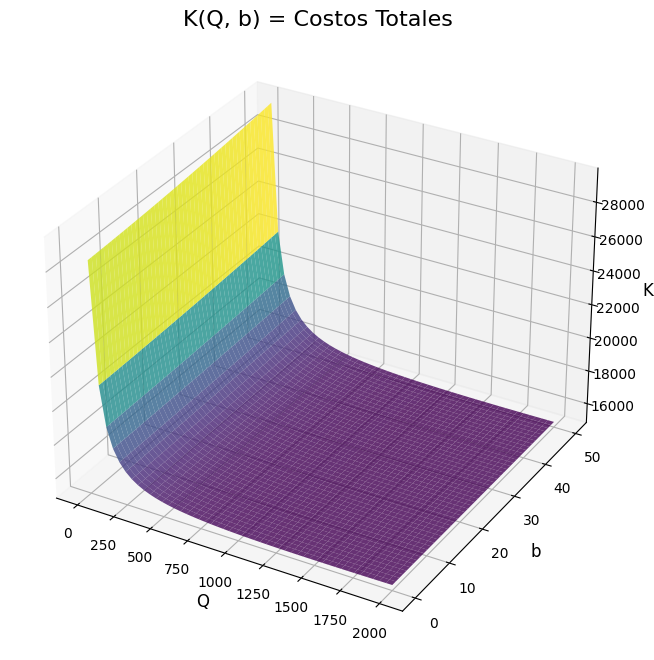

In [83]:
#Se grafica la función
x = np.linspace(0, 2000)
y = np.linspace(0, 50)

X, Y = np.meshgrid(x, y)
Z = K([X, Y])

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.set_title('K(Q, b) = Costos Totales', fontsize=16)
ax.set_xlabel('Q', fontsize=12)
ax.set_ylabel('b', fontsize=12)
ax.set_zlabel('K', fontsize=12)

plt.show()

Para optimizar, se pueden utilizar dos formas. La primera, es utilizando algoritmos de optimización que sirven para cualquier función. La segunda, es utilizando la formula del $Q^{*}$ y $b^{*}$ optimizado. Para efectos de practicidad, sólo se utilizará la primera.

In [70]:
#Q inicial para la optimización
q0 = [1000, 50]

#Optimización
result = optimize.basinhopping(K, q0, minimizer_kwargs = {"method": "BFGS"}, niter = 1000)
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 15140.052548328762
                          x: [ 1.573e+03  2.473e+01]
                        nit: 1000
      minimization_failures: 338
                       nfev: 88332
                       njev: 28862
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 15140.052548328762
                                    x: [ 1.573e+03  2.473e+01]
                                  nit: 19
                                  jac: [ 0.000e+00  0.000e+00]
                             hess_inv: [[ 4.446e+02  1.988e+01]
                                        [ 1.988e+01  7.398e+01]]
                                 nfev: 72
                                 njev: 24

In [71]:
#Valor de Q optimizado
optimized_Q = result.x[0]
print("El tamaño de lote debe de ser de {} unidades".format(optimized_Q))

El tamaño de lote debe de ser de 1572.6872660904905 unidades


In [72]:
#Valor de b optimizado
optimized_b = result.x[1]
print("La cantidad de faltantes debe de ser de {} unidades".format(optimized_b))

La cantidad de faltantes debe de ser de 24.726142374999682 unidades


In [73]:
#Valor de K optimizado - Costo Optimizado
optimized_K = result.fun
print("El costo total minimizado es de ${}".format(optimized_K))

El costo total minimizado es de $15140.052548328762


También se puede optimizar de otra manera, introduciendo todos los parámetros dentro de la función y luego analizar la parte del costo solamente.

In [85]:
def EPQ_function(c, D, A, i, P, Cf, Cft, Q, b):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    c: Costo unitario del producto
    D: Tasa de Demanda
    A: Costo unitario de ordenar
    el producto
    i: Porcentaje de mantener en
    inventario
    P: Tasa de Producción
    Cf: Costo unitario de faltante
    Cft: Costo unitario de faltante
    en el tiempo
    Q: Tamaño de lote seleccionado.
    b: Cantidad de faltantes admitidos
  Returns:
    K: Costo total promedio
  """
  if Q == 0 or P == 0:
    return np.inf
  h = i * c #Costo de mantener el inventario
  return c * D + (A * D) / Q + ((h * (Q * (1 - (D/P)) - b)**2) / (2 * Q * (1 - (D/P)))) + ((Cf * b * D) / Q) + ((Cft * b**2) / (2 * Q * (1 - (D/P))))

print("El costo total minimizado es de ${}".format(EPQ_function(3, 4800, 120, 0.20, 24000, 0.1, 14.4, 1572, 25)))

El costo total minimizado es de $15140.053139312977


Dejando la función de costo solamente con dos variables de decisión.

In [91]:
Q_vector = [1000, 30]

def total_cost(Q_vector):
  cost = 0
  Q = Q_vector[0]
  b = Q_vector[1]
  for i in range(0, 1):
    cost += EPQ_function(3, 4800, 120, 0.20, 24000, 0.1, 14.4, Q, b)
  return cost

In [92]:
result = optimize.basinhopping(total_cost, Q_vector, minimizer_kwargs = {"method": "BFGS"}, niter = 100)
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 15140.052548407519
                          x: [ 1.573e+03  2.473e+01]
                        nit: 100
      minimization_failures: 35
                       nfev: 7611
                       njev: 2441
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 15140.052548407519
                                    x: [ 1.573e+03  2.473e+01]
                                  nit: 4
                                  jac: [ 0.000e+00  0.000e+00]
                             hess_inv: [[ 1.000e+00  0.000e+00]
                                        [ 0.000e+00  1.266e+02]]
                                 nfev: 45
                                 njev: 15

In [93]:
#Valor de Q optimizado
optimized_Q = result.x[0]
print("El tamaño de lote debe de ser de {} unidades".format(optimized_Q))

El tamaño de lote debe de ser de 1572.674675631307 unidades


In [94]:
#Valor de b optimizado
optimized_b = result.x[1]
print("La cantidad de faltantes debe de ser de {} unidades".format(optimized_b))

La cantidad de faltantes debe de ser de 24.729007278189204 unidades


In [95]:
#Valor de K optimizado - Costo Optimizado
optimized_K = result.fun
print("El costo total minimizado es de ${}".format(optimized_K))

El costo total minimizado es de $15140.052548407519


#### Referencias


* Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Zill, D. G. (2011). Cálculo de varias variables (4a. ed.).